**This notebook covers feature sclaing for given linear regression problem and covers learning rate optimization**

In [4]:
# let's import the required libs

import numpy as np
import matplotlib.pyplot as plt
import copy
np.set_printoptions(precision=2)

In [5]:
# let's prepare the training data using housing examples

x_train = np.array([[952,2,1,65],[1244,3,2,64],[1947,3,2,17]])
y_train = np.array([271.5,232,509.8])
x_features = np.array(['size(sqft','bedrooms','floors','age'])

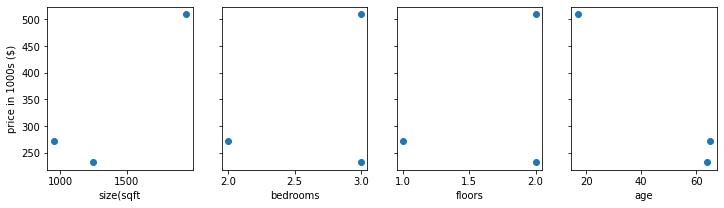

In [6]:
# now let's plot these features on the graph

# x_size = x_features.shape[0]

# One way to plot on graph
#for i in range(x_size):
#    plt.scatter(x_train[:,i],y_train,marker='x',color='g')
#    plt.xlabel(x_features[i])
#    plt.ylabel('price (per 1000 $)')
#    plt.show()

# anoter way to plot adjacently

# fig defines a container for subplots and ax defines the axes
# 1 defines number of rows of subplots and 4 defines columns
# figsize defines width and height of the subplots
# sharey defines if the y axis is shared between subplots

fig,ax=plt.subplots(1, 4, figsize=(12, 3), sharey=True)

for i in range(len(ax)):
    ax[i].scatter(x_train[:,i],y_train)
    ax[i].set_xlabel(x_features[i])

ax[0].set_ylabel("price in 1000s ($)")
plt.show()

In [7]:
# now let's create a function to compute the predicted y

def compute_pred_y_fn(x,w,b):
    fn_wb = np.dot(x,w) + b
    return fn_wb

In [8]:
# now let's test the function to compute predicted y

w_sample = np.array([0.0005,1,1,1])
b_sample = 500

for i in range(x_train.shape[0]):
    pred_y = compute_pred_y_fn(x_train[i],w_sample,b_sample)
    print(f"Predicted y for {x_train[i]} is: {pred_y}")

Predicted y for [952   2   1  65] is: 568.476
Predicted y for [1244    3    2   64] is: 569.622
Predicted y for [1947    3    2   17] is: 522.9735000000001


In [9]:
# now let's create the cost function to further understand the cost factor

def compute_cost_fn(x, y, w, b):
    error_sum = 0
    for i in range(x.shape[0]):
        fn_wb = compute_pred_y_fn(x[i], w, b)
        error = np.square(fn_wb - y[i])
        error_sum += error

    j_wb = error_sum / (2 * x.shape[0])
    return j_wb

In [10]:
# now let's compute the cost using the cost function

cost = compute_cost_fn(x_train,y_train,w_sample,b_sample)
print(f"Cost for the given training dataset is: {cost}")

Cost for the given training dataset is: 33726.150093708326


In [11]:
# now let's calculate the derivatives of cost function w.r.t w and b

def comptute_deriv_jwb(x,y,w,b):

    # derivative function is as simple as (pred_y - train_y) * xij/m and (pred_y - train_y)/m

    x_row = x.shape[0] # number of training examples
    x_col = x.shape[1] # number of training features

    dj_dw = np.zeros(x_col)
    dj_db = 0
    
    for i in range(x_row):
        
        error = compute_pred_y_fn(x[i],w,b) - y[i]
        
        for j in range(x_col):
            dj_dw[j] += error * x[i,j] 
        dj_db += error

    return dj_dw/x_row, dj_db/x_row

In [73]:
# now let's create the gradient descent function

def compute_gradient_descent(x,y,a,n,w,b):

    j_hist = np.zeros(n)
    w_hist = np.zeros((n,x.shape[1]))
    b_hist = np.zeros(n)
    w_copy = copy.deepcopy(w)
    b_copy = b

    # computing gradient descent is iterating and computing change in values of w and b w.r.t learning rate and derivatives
    counter = 0 
    for i in range(n):
        j_hist[i] = compute_cost_fn(x,y,w_copy,b_copy)
        w_hist[i] = w_copy
        b_hist[i] = b_copy
        counter += 1
        if counter % 500 == 0:
            print(f"when w is {w_copy} and b is {b_copy} then cost is: {j_hist[i]}")
        w_copy = w_copy - a * comptute_deriv_jwb(x,y,w_copy,b_copy)[0]
        b_copy = b_copy - a * comptute_deriv_jwb(x,y,w_copy,b_copy)[1]
        
    return j_hist,w_copy,b_copy

In [60]:
# let's test our gradient descent function
a_in = 1.0e-6
w_in = np.array([5.0e-01,9.1e-04,4.7e-04,1.1e-02])
b_in = 3.3e-04
compute_gradient_descent(x_train,y_train,a_in,1000,w_in,b_in);

when w is [-12.47  -0.02  -0.02  -0.38] and b is 0.009529141634923396 then cost is: 168710070.1831391
when w is [-691.13   -1.27   -0.81  -19.4 ] and b is 0.4972217785552241 then cost is: 498276698494.48584
when w is [-37573.27    -69.07    -44.13  -1051.23] and b is 27.007454179325123 then cost is: 1471646365403630.0
when w is [-2041964.59    -3753.39    -2398.38   -57125.8 ] and b is 1467.7341639353558 then cost is: 4.346466605556945e+18
when w is [-1.11e+08 -2.04e+05 -1.30e+05 -3.10e+06] and b is 79765.26676222743 then cost is: 1.2837168220136664e+22
when w is [-6.03e+09 -1.11e+07 -7.08e+06 -1.69e+08] and b is 4334911.789041316 then cost is: 3.7914219265230185e+25
when w is [-3.28e+11 -6.02e+08 -3.85e+08 -9.17e+09] and b is 235584496.6518659 then cost is: 1.1197859199485037e+29
when w is [-1.78e+13 -3.27e+10 -2.09e+10 -4.98e+11] and b is 12803041391.134619 then cost is: 3.307256567102391e+32
when w is [-9.68e+14 -1.78e+12 -1.14e+12 -2.71e+13] and b is 695792257948.3705 then cost is:

**Now let's use Z score normalization to scale the values for features**

Z-Score normalization helps in condensing the mean average of all the independent variables/features to zero with a standard deviation of 1. Z-Score normalization follows following implementation method:

- Take average or mean of all the given values for the feature
- Take squared sum of all individual feature values subtracted from mean and divide it by total number of values

In [61]:
def z_score_normalize(x):
    # X (ndarray (m,n))     : input data, m examples, n features

    mu = np.mean(x, axis=0) # calculat mean for all columns in the given array
    sigma = np.std(x, axis=0) # calculate average deviation for all columns in given array

    print(f"Given array is: {x}")
    print(f"Mean of the array is: {mu}")
    print(f"Sigma of the array is: {sigma}")

    x_norm = (x - mu)/sigma

    print(f"Normalized array is: {x_norm}")

    return (x_norm, mu, sigma)

In [62]:
# now let's try and normalize the given training array

x_norm, mu, sigma = z_score_normalize(x_train)

Given array is: [[ 952    2    1   65]
 [1244    3    2   64]
 [1947    3    2   17]]
Mean of the array is: [1381.      2.67    1.67   48.67]
Sigma of the array is: [417.6    0.47   0.47  22.4 ]
Normalized array is: [[-1.03 -1.41 -1.41  0.73]
 [-0.33  0.71  0.71  0.68]
 [ 1.36  0.71  0.71 -1.41]]


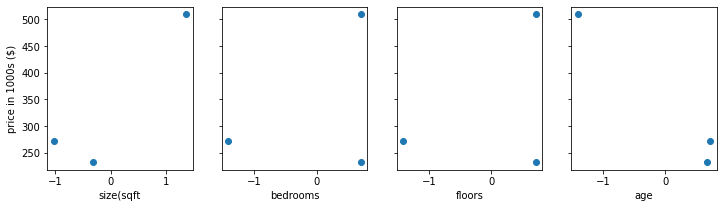

In [63]:
# now let's plot the normalized features on graph

fig,ax=plt.subplots(1, 4, figsize=(12, 3), sharey=True)

for i in range(len(ax)):
    ax[i].scatter(x_norm[:,i],y_train)
    ax[i].set_xlabel(x_features[i])

ax[0].set_ylabel("price in 1000s ($)")
plt.show()

In [75]:
# let's test our gradient descent function
a_in = 1.0e-2
w_in = np.zeros(x_norm.shape[1])
b_in = 0
j_hist,w_norm,b_norm = compute_gradient_descent(x_norm,y_train,a_in,1000,w_in,b_in);

when w is [ 60.04 -19.24 -19.24 -82.34] and b is 335.52495943876124 then cost is: 4.069867045321922
when w is [ 60.75 -20.18 -20.18 -83.6 ] and b is 337.7519375673398 then cost is: 0.0008001344926703002


In [78]:
# now let's take the weight computed above after running the function on normalized data

x_input = np.array([952, 2, 1, 65])

x_input_norm = (x_input - mu)/sigma

print(x_input_norm)

price_pred = np.dot(x_input_norm, w_norm) + b_norm

print(f"Predicted price is: {price_pred}")


[-1.03 -1.41 -1.41  0.73]
Predicted price is: 271.4634183500612
